**2021120118 김주연 머신러닝기반데이터분석 Mid Term Regression 코드파일입니다.**

# 프로세스
0. 문제정의
1. 라이브러리 불러오기
2. 데이터 수집
3. 데이터 탐색

  3-1. 데이터셋 기본 정보 파악 및 정리

  3-2. 종속변수 탐색

  3-3. 독립변수 탐색

  3-4. 변수들 간의 관계 탐색

    3-4-1. 독립변수와 종속변수 간의 관계 탐색 (1): current_value(현재 이적료)와 highest_value(최고 이적료)의 관계

    3-4-2. 독립변수와 종속변수 간의 관계 탐색 (2): current_value(현재 이적료)와 age(선수의 나이)의 관계


4. 모델링

  4-1. 데이터 전처리

  4-2. 회귀 모델링

  4-3. 모델 해석

  4-4. 모델 예측 결과 및 성능 평가




# **0. 문제정의**

**주제: 축구 수비수 이적료 예측**

유럽, 아시아, 남미, 북미 리그 축구 선수들의 이적료 데이터를 활용해 이 중 수비수의 이적료를 예측하는 선형 회귀 모델을 만듭니다. 구체적으로 수비수의 특성(나이, 키, 출전 시간 등)과 현재 이적료를 활용하겠습니다.

---

**y=f(x) 설명**


*   Y(종속변수): 축구 수비수 이적료
*   X(독립변수): 축구 수비수 이적료에 영향을 주는 요소들
*   F: 회귀모델링(Regression)


---


**Regression 선택이유**

종속변수로 설정한 ‘이적료'는 연속적이며 뉴머리컬한 값을 가지기 때문에 회귀모델을 선정하였습니다.



# **1. 라이브러리 불러오기**

In [ ]:
# 필요한 라이브러리들을 임포트합니다.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **2. 데이터 수집하기**

  [2-1]: 사용할 데이터셋 가져오기

  [2-2]: 변수 의미 파악

  [2-3]: 분석에 필요한 데이터 선택

# **2-1. 사용할 데이터셋 가져오기: final_data.csv**



*   'final_data'는 유럽, 아시아, 남미, 북미 리그 축구선수의 현재 이적료 및 선수 특성 데이터가 들어있습니다.
*   본 프로젝트의 주제는 '수비수' 이적료 예측이기 때문에 데이터셋을 탐색해 본 뒤, 해당 데이터셋에서 수비수 데이터만 뽑아서 사용할 것입니다.

* 축구는 포지션별로 판단 기준이 상이하기 때문에 한꺼번에 보는 것보다 포지션을 타겟하여 예측하는 것이 이적료 추세를 보는 데 적합합니다. 따라서 저는 가장 관심 있는 포지션인 '수비수'로 타겟팅하여 프로젝트를 진행하고자 합니다.



In [ ]:
entire_df = pd.read_csv("final_data.csv")

In [ ]:
# 전체 데이터셋을 불러와서 첫 다섯 줄을 출력해 데이터의 구성을 살펴봅니다.
entire_df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


# **2-2. 변수의 의미 파악**



*   Entire Df Feature(column/Attribute/X) List

1. player: 이적시장 웹사이트인 'Transfermarkt' 페이지에 있는 선수 데이터명

2. team: 데이터 수집 당시 선수가 뛰었던 팀 이름

3. name: 선수 이름

4. position: 선수의 포지션

5. height: 선수의 키(cm 단위)

6. age: 선수의 나이

7. appearance: 경기에 출전한 횟수

8. goals: 선수의 득점 수

9. assists: 선수의 어시스트(도움, 득점자에게 마지막으로 준 결정적 패스) 수

10. yellow cards: 1차 경고 받은 수

11. second yellow cards: 2차 경고 받은 수

12. red cards: 퇴장 수

13. goals conceded: 허용 골 수(골키퍼 포지션 관련)

14. clean sheets: 무실점 경기 수(골키퍼 포지션 관련)

15. minutes played: 출전 시간

16. days_injured: 선수가 부상으로 인해 결장한 날짜 수

17. games_injured: 선수가 부상으로 인해 결장한 경기 수

18. award: 선수가 받은 상 수

19. current_value: 선수의 현재 이적료

20. highest_value: 선수의 과거 최고 이적료

21. position_encoded: 포지션을 숫자로 인코딩함

22. winger:선수가 윙 포지션인지의 여부 (윙 포지션 관련)



# **2-3. 주제에 맞는 데이터 데이터프레임화**

본격적으로 데이터 탐색을 하기 전, 데이터의 구성과 변수 의미를 확인하며 파악한 '주제에 적합한 데이터'들을 데이터 프레임화할 것입니다.


---



주제: 축구 수비수 이적료 예측

수비수의 이적료를 예측하는 것이기 때문에 모든 포지션이 들어있는 전체 데이터에서 수비수 포지션만 따로 뽑아 데이터 프레임화할 것입니다.

구체적으로 앞서 데이터 셋 구조와 변수의 의미를 살펴보며 포지션을 숫자로 인코딩한 'position_encoded' 피쳐에서 수비수(Defender) 관련은 2번으로 인코딩된 것을 알 수 있었습니다. 따라서 position_encoded 피쳐를 활용해 수비수 데이터를 뽑아낼 것입니다.

또한 변수의 의미를 살펴보며 수비수와는 관련이 없는 타 포지션에 해당하는 피쳐들이 존재함을 알 수 있었습니다. 따라서 수비수 데이터 프레임을 만들 때 해당 피쳐들 역시 제거할 것입니다.

In [ ]:
# 포지션 종류 확인

entire_df['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

해석: 수비수 관련은 총 4가지 있음을 확인할 수 있습니다.

('Defender Centre-Back', 'Defender Left-Back', 'Defender Right-Back', 'Defender')

In [ ]:
# 포지션 별 데이터 수 확인
entire_df['position'].value_counts()

position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

In [ ]:
# 수비수들 데이터만 담긴 데이터 프레임 생성: 포지션이 2번으로 되어있는 데이터만 따로 모으고 수비수와 상관없는 타 포지션 관련된 피쳐들을 제거하여 데이터 프레임 생성

defender_df = entire_df[entire_df['position_encoded']==2][[
    'player', 'team', 'name', 'position', 'height', 'age', 'appearance',
    'goals', 'assists', 'yellow cards', 'second yellow cards',
    'red cards','minutes played', 'days_injured','games_injured',
    'award', 'current_value', 'highest_value']]

defender_df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.000000,0.0,6408,175,22,9,50000000,50000000
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.000000,0.0,5031,238,51,21,40000000,80000000
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.018900,0.0,4762,148,27,1,25000000,70000000
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.000000,0.0,5471,95,19,10,15000000,35000000
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.000000,0.0,416,932,169,7,2000000,20000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10731,/rhys-williams/profil/spieler/82474,Western Sydney Wanderers,Rhys Williams,Defender Centre-Back,187.0,34.0,6,0.000000,0.000000,0.681818,0.000000,0.0,528,1307,146,0,150000,2000000
10732,/adama-traore/profil/spieler/70209,Western Sydney Wanderers,Adama Traoré,Defender Left-Back,170.0,33.0,50,0.000000,0.000000,0.170374,0.021297,0.0,4226,412,63,4,250000,1500000
10733,/daniel-wilmering/profil/spieler/660145,Western Sydney Wanderers,Daniel Wilmering,Defender Left-Back,178.0,22.0,22,0.000000,0.131291,0.000000,0.000000,0.0,1371,0,0,0,200000,350000
10734,/gabriel-cleur/profil/spieler/425767,Western Sydney Wanderers,Gabriel Cléùr,Defender Right-Back,181.0,25.0,42,0.027149,0.162896,0.380090,0.027149,0.0,3315,66,11,1,400000,400000


# **3. 데이터 탐색**

: 데이터의 각 변수(features, columns, attributes, 독립변수들)의 기본 정보 및 특성을 자세히 살펴보겠습니다.

  [3-1]: 데이터셋 기본 정보 파악

  [3-2]: 종속 변수 탐색

  [3-3]: 독립 변수 탐색

  [3-4]: 종속 변수와 독립 변수 간의 관계 탐색

In [ ]:
# seaborn 라이브러리를 통해 그래프 배경 설정

sns.set_style('darkgrid')

# **3-1. 데이터셋 기본 정보 파악**


In [ ]:
# 데이터 프레임 구조 보기

defender_df.shape

(3528, 18)

해석: 행이 3528, 열이 18개로 구성되었습니다.

value_counts 상에서 수비수 데이터들을 합치면 총 3,528개가 되는 것을 확인할 수 있어 데이터프레임이 제대로 만들어졌음을 파악할 수 있습니다.

In [ ]:
#피쳐에 결측치가 있는지 확인

defender_df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

해석: 결측치 없음

In [ ]:
# 데이터 타입 확인

defender_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528 entries, 3 to 10735
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               3528 non-null   object 
 1   team                 3528 non-null   object 
 2   name                 3528 non-null   object 
 3   position             3528 non-null   object 
 4   height               3528 non-null   float64
 5   age                  3528 non-null   float64
 6   appearance           3528 non-null   int64  
 7   goals                3528 non-null   float64
 8   assists              3528 non-null   float64
 9   yellow cards         3528 non-null   float64
 10  second yellow cards  3528 non-null   float64
 11  red cards            3528 non-null   float64
 12  minutes played       3528 non-null   int64  
 13  days_injured         3528 non-null   int64  
 14  games_injured        3528 non-null   int64  
 15  award                3528 non-null   int64

해석: 선수 고유 데이터명, 팀명, 이름, 포지션 명이 문자형 변수이고 나머지는 숫자 형임을 알 수 있습니다.

In [ ]:
#숫자형 변수들의 기초 통계값을 봅니다.

defender_df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value
count,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3.528000e+03,3.528000e+03
mean,182.498151,26.298765,36.743481,0.043751,0.055410,0.199149,0.006141,0.006583,2746.551587,130.534864,17.534014,1.873299,3.298016e+06,5.395218e+06
std,6.400836,4.587402,25.206102,0.078962,0.108357,0.292878,0.025548,0.025012,2059.793929,184.991890,24.741796,3.312492,7.597221e+06,1.056988e+07
min,162.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,178.000000,23.000000,13.000000,0.000000,0.000000,0.097959,0.000000,0.000000,885.500000,0.000000,0.000000,0.000000,3.000000e+05,5.000000e+05
50%,183.000000,26.000000,37.000000,0.022344,0.023307,0.175325,0.000000,0.000000,2520.000000,52.000000,7.000000,1.000000,8.000000e+05,1.500000e+06
75%,187.000000,30.000000,57.000000,0.064051,0.077410,0.257176,0.000000,0.000000,4336.000000,201.250000,26.000000,2.000000,2.800000e+06,5.000000e+06
max,206.000000,40.000000,107.000000,1.956522,3.461538,11.250000,0.559006,0.629371,8860.000000,1570.000000,206.000000,43.000000,7.500000e+07,1.100000e+08


In [ ]:
#문자형 변수 중 name에서 선수 확인 후 중복을 제거합니다.

count_name = defender_df['name'].unique()
print(len(count_name))
count_name

3512


array(['Lisandro Martínez', 'Raphaël Varane', 'Harry Maguire', ...,
       'Daniel Wilmering', 'Gabriel Cléùr', 'Tate Russell'], dtype=object)

In [ ]:
print(count_name)

['Lisandro Martínez' 'Raphaël Varane' 'Harry Maguire' ...
 'Daniel Wilmering' 'Gabriel Cléùr' 'Tate Russell']


참고 사항: 팀 데이터도 unique를 통해 중복을 제거 하지 않은 이유는 한 팀에는 같은 포지션임에도 주전용, 스페어용 등 여러 선수가 속할 수 있기 때문입니다. 따라서 한 팀에서 같은 포지션의 데이터가 여러개 있더라도 선수들이 달라 team은 중복 제거를 해주지 않았습니다.

# **3-2. 종속 변수 탐색**

: 종속 변수(타겟 변수, y)를 설정합니다.



*   **current_value: 선수의 현재 이적료**
  
  *   현재 이적료가 종속 변수(y)가 됩니다.
  *   이유: 수비수의 이적료를 맞추기 위함이기 때문입니다.



In [ ]:
# 종속 변수의 기초통계량을 살펴봅니다.

defender_df['current_value'].describe()

count    3.528000e+03
mean     3.298016e+06
std      7.597221e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      2.800000e+06
max      7.500000e+07
Name: current_value, dtype: float64

<Axes: >

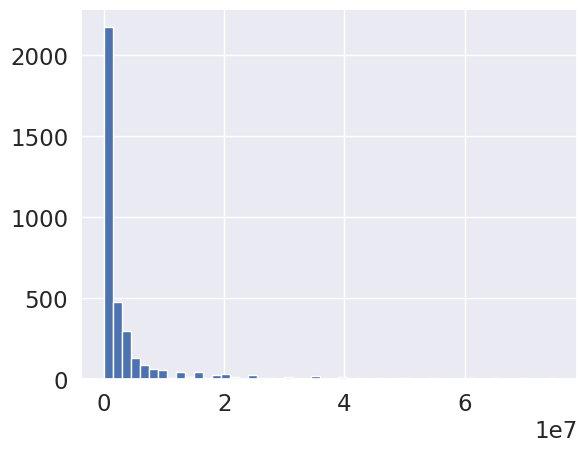

In [ ]:
#히스토그램으로 시각화하여 살펴봅니다

defender_df['current_value'].hist(bins=50)

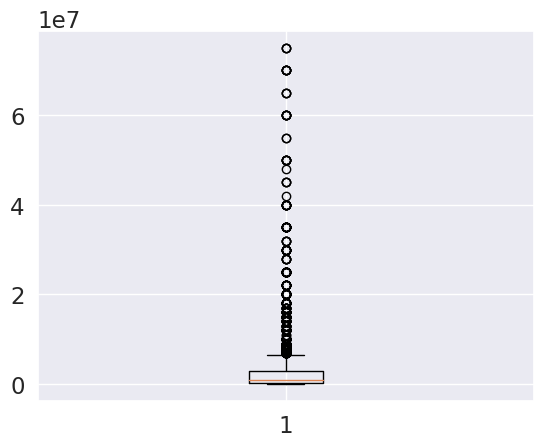

In [ ]:
#boxplot을 이용해 중간값과 아웃라이어를 확인합니다.

plt.boxplot(defender_df['current_value'])
plt.show()

해석: 17만 달러에서 7,500만 달러까지 매우 다양하게 분포되어 있습니다. 대부분의 이적료는 250만 달러 범위에 집중되어 있지만, 일부는 430만 달러 이상 또는 17만 달러 미만으로 극단적인 값을 보입니다. 평균 이적료는 약 329.8만 달러이지만, 표준 편차가 759.7만 달러로 매우 높아 이적료 분포가 넓음을 알 수 있습니다.

극단값들을 아웃라이어로 삭제할 경우, 스타급 선수들의 이적료를 잘 예측하지 못하게 됩니다. 따라서 아웃라이어까지 예측하는 게 의미 있는 도메인이라고 생각하기 때문에 남겨두겠습니다.

# **3-3. 독립변수 탐색**

<ipython-input-202-56b8ec791558>:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  defender_df[numerical_columns].hist(ax=ax)


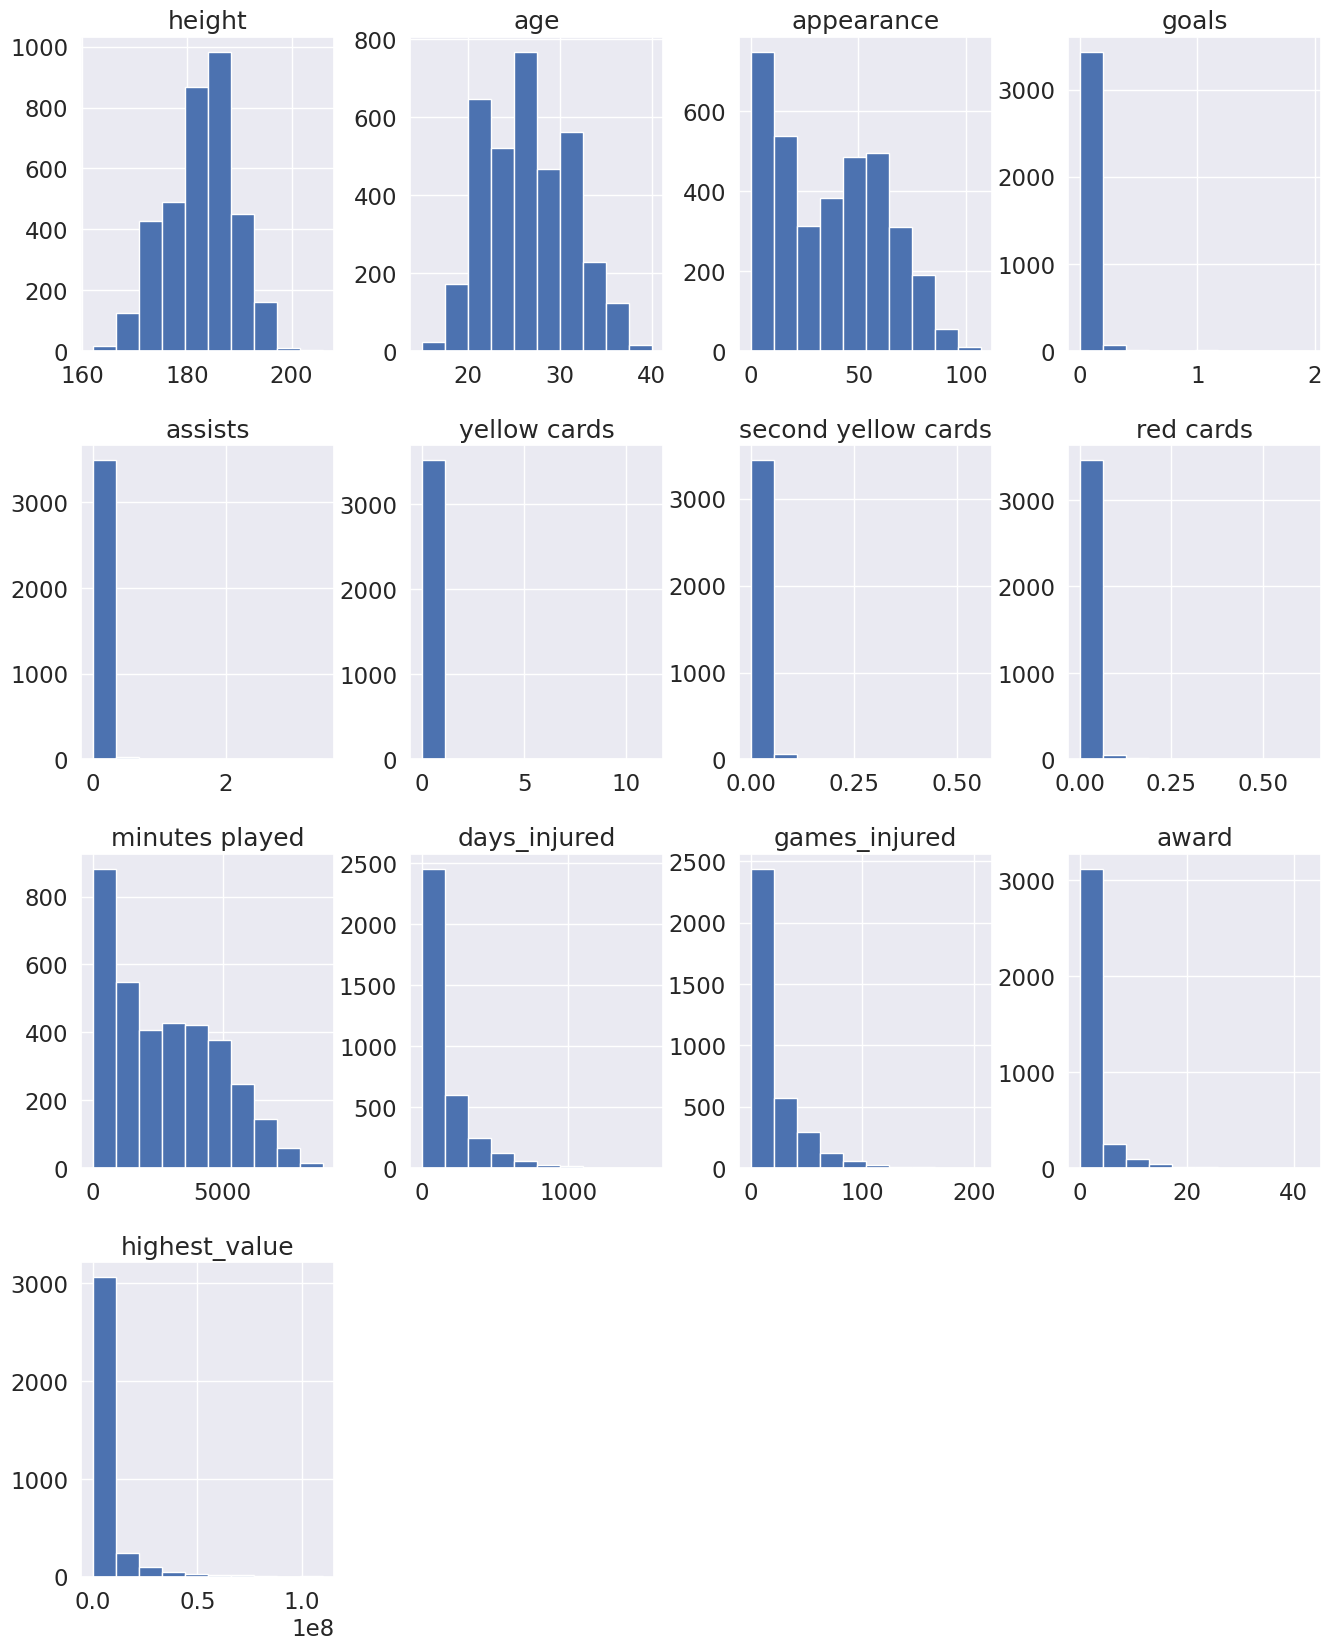

In [ ]:
#숫자형 피쳐들을 히스토그램을 통해 살펴봅니다.
numerical_columns=['height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'minutes played', 'days_injured', 'games_injured', 'award', 'highest_value']

### figsize()는 plot()의 기본 크기를 지정합니다.
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

defender_df[numerical_columns].hist(ax=ax)
plt.show()

# **3-4. 설명변수와 종속변수 간의 관계 탐색**

상관관계분석을 통해 모든 변수들 간의 관계를 탐색합니다.

In [ ]:
corr_cols = ['current_value','height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'minutes played', 'days_injured', 'games_injured', 'award', 'highest_value']

corr = defender_df[corr_cols].corr(method = 'pearson')
corr

,current_value,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,highest_value
current_value,1.000000,0.093117,-0.073550,0.423228,0.060348,0.071004,-0.020659,-0.021433,-0.008700,0.428623,0.122918,0.152327,0.272753,0.845290
height,0.093117,1.000000,-0.001904,0.097795,0.022354,-0.193600,0.049281,0.023578,0.032447,0.142706,0.074808,0.073747,-0.008474,0.086378
age,-0.073550,-0.001904,1.000000,0.122585,0.003611,-0.054025,0.040100,0.036150,0.038729,0.136388,0.322231,0.345016,0.361235,0.108786
appearance,0.423228,0.097795,0.122585,1.000000,0.070957,0.070922,-0.034534,-0.020813,0.000262,0.975328,0.102662,0.118410,0.180373,0.410763
goals,0.060348,0.022354,0.003611,0.070957,1.000000,0.183544,0.011593,-0.000024,-0.006133,0.064103,0.027220,0.023465,0.057298,0.059168
assists,0.071004,-0.193600,-0.054025,0.070922,0.183544,1.000000,-0.005194,-0.029065,0.022443,0.041995,-0.004191,0.002669,0.041611,0.065811
yellow cards,-0.020659,0.049281,0.040100,-0.034534,0.011593,-0.005194,1.000000,0.029304,0.014098,-0.043243,0.001076,0.003423,0.009977,-0.010436
second yellow cards,-0.021433,0.023578,0.036150,-0.020813,-0.000024,-0.029065,0.029304,1.000000,-0.006576,-0.019463,-0.008361,-0.002264,-0.011887,-0.019761
red cards,-0.008700,0.032447,0.038729,0.000262,-0.006133,0.022443,0.014098,-0.006576,1.000000,0.000147,0.019942,0.019987,0.010991,0.002955
minutes played,0.428623,0.142706,0.136388,0.975328,0.064103,0.041995,-0.043243,-0.019463,0.000147,1.000000,0.084995,0.098801,0.164803,0.402911


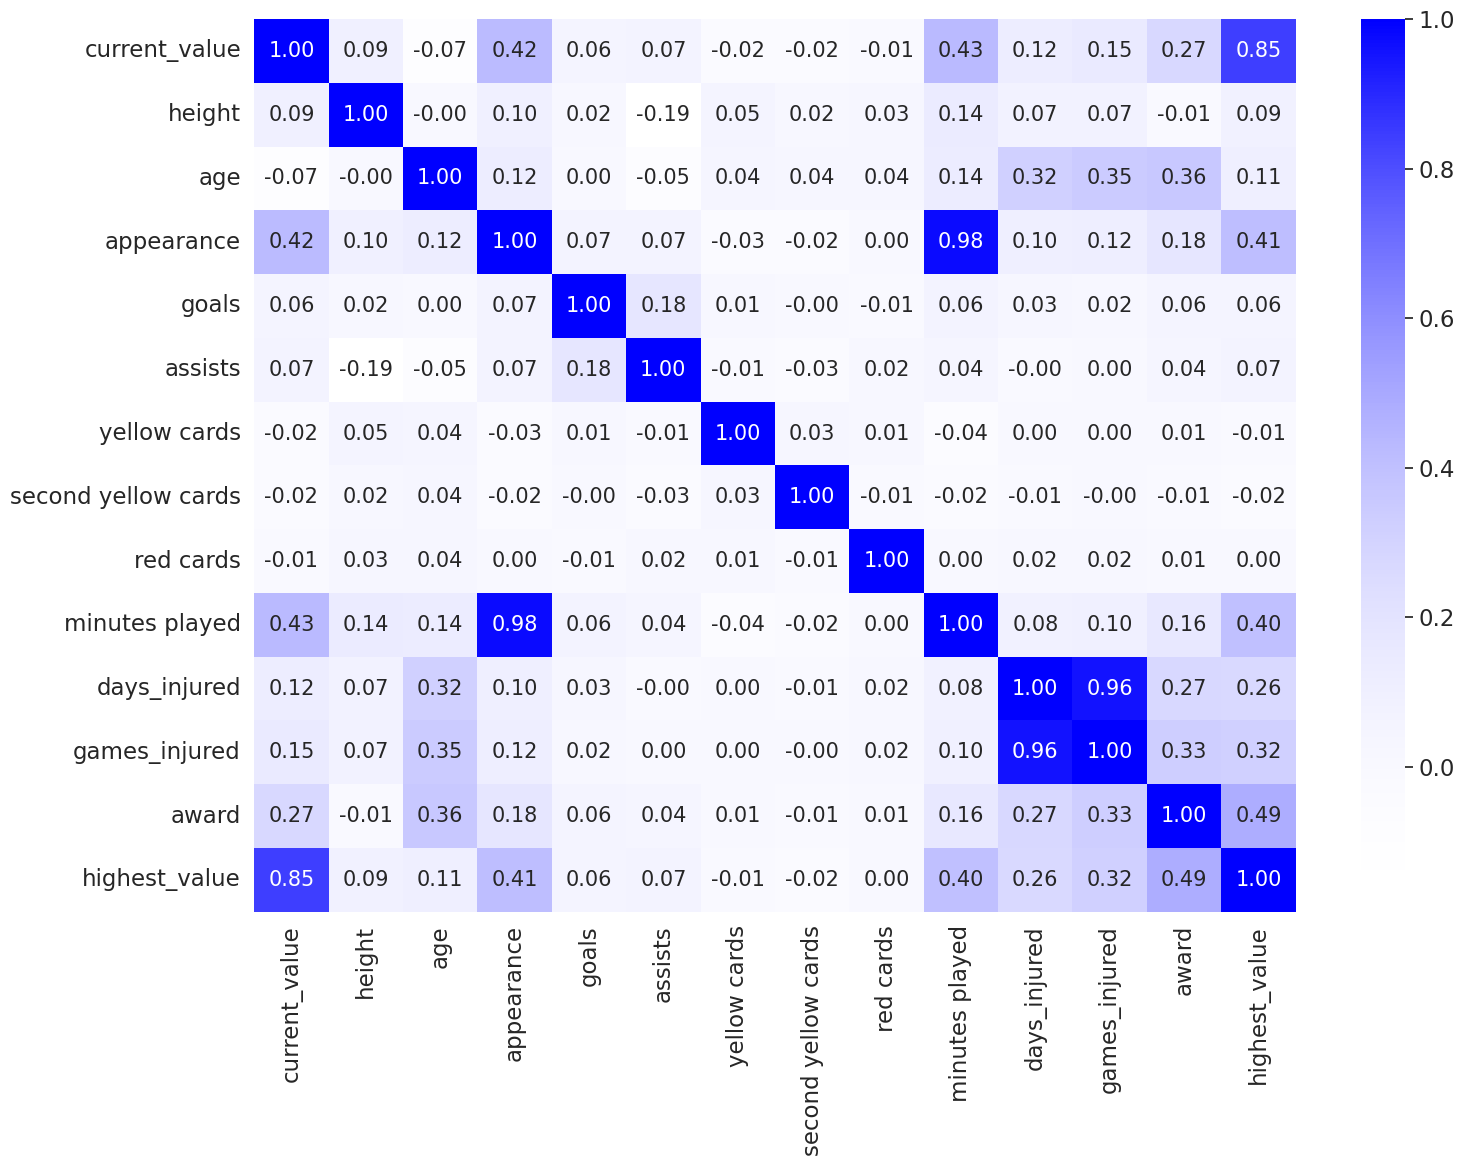

In [ ]:
import matplotlib.colors as mcl
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# 히트맵 시각화
fig = plt.figure(figsize=(16, 12))
sns.set(font_scale=1.5)  # heatmap 안의 font-size 설정

# 원하는 색상을 정의해주었습니다.
h = 240
s = 0.99
v = 1

colors = [
    mcl.hsv_to_rgb((h/360, 0, v)),
    mcl.hsv_to_rgb((h/360, 0.5, v)),
    mcl.hsv_to_rgb((h/360, 1, v))
]

cmap = LinearSegmentedColormap.from_list('my_cmap', colors, gamma=2)

heatmap = sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={'size': 15},
                      cmap=cmap)

plt.tight_layout()  # 여백을 조정합니다.
plt.show()  # 화면에 출력합니다.

* Defender Df Feature(column/Attribute/X) List

height: 선수의 키(cm 단위)

age: 선수의 나이

appearance: 경기에 출전한 횟수

goals: 선수의 득점 수

assists: 선수의 어시스트(도움, 득점자에게 마지막으로 준 결정적 패스) 수

yellow cards: 1차 경고 받은 수

second yellow cards: 2차 경고 받은 수

red cards: 퇴장 수

minutes played: 출전 시간

days_injured: 선수가 부상으로 인해 결장한 날짜 수

games_injured: 선수가 부상으로 인해 결장한 경기 수

award: 선수가 받은 상 수

current_value: 선수의 현재 이적료

highest_value: 선수의 과거 최고 이적료

해설: 우리가 예측하고자 하는 종속 변수인 “current_value(현재 이적료)”와 다른 변수 간의 상관관계를 살펴본 뒤, 히트맵으로 시각화하였습니다.

이를 통해, current_value와 두드러진 양의 상관관계는“highest_value - 과거 최고 이적료”(0.85) , 두드러진 음의 상관관계는 "age - 선수의 나이" (-0.07) 라는 것을 알 수 있습니다.

그러나 한 가지 눈여겨 볼 점은 'appearance'와 'minutes played', 'days_injured'와 'games_injured'와 같이 동일한 내용이지만, 기준을 다르게 한 변수들의 상관관계가 매우 높게 나왔다는 것입니다. 후에 다중공선성을 고려하여 제거해 주는 것이 바람직합니다. 따라서 보통 이적료나 선수의 가치를 볼 때, 출전 시간보다는 일차적으로 출전 수를 많이 보고 결장한 날짜보단, 경기 수를 보는 것이 바람직하기에 전처리 단계에서 해당 변수들만 남기도록 하겠습니다.

# **3-4-1. 설명변수(x)와 종속변수(y) 간의 관계 탐색 1:**
#**현재이적료(current_value)와 과거 최고 이적료(highest_value)의 관계 살펴보기**

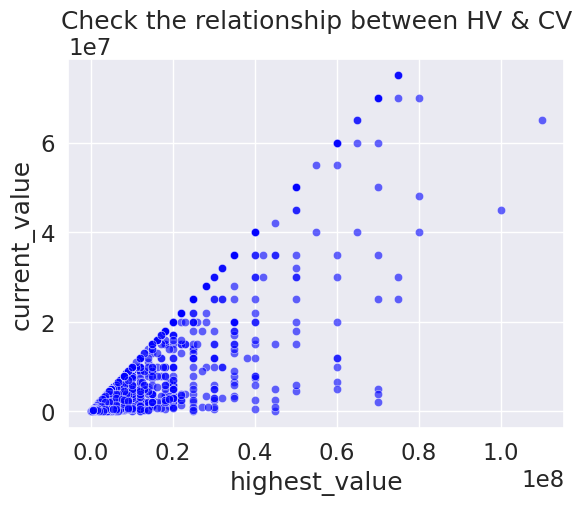

In [ ]:
#scatter plot을 통해 가장 높은 양의 상관관계를 보인 두 변수의 관계를 탐색해보겠습니다.

sns.scatterplot(data=defender_df, x='highest_value', y='current_value', markers='o', color='blue', alpha=0.6)
plt.title('Check the relationship between HV & CV')
plt.show()

해설: 산점들이 대각선 방향으로 우측 상단으로 퍼져 있는 것을 볼 수 있습니다. 따라서 현재 이적료가 과거 최고 이적료와 양의 상관관계(positive correlation)를 갖고 있다 할 수 있습니다.

즉, 과거 최고 이적료가 높았던 선수들은 상대적으로 현재 이적료도 높다 할 수 있습니다.

# **3-4-2. 설명변수(x)와 종속변수(y) 간의 관계 탐색 2:**
#**현재이적료(current_value)와 선수의 나이(age)의 관계 살펴보기**

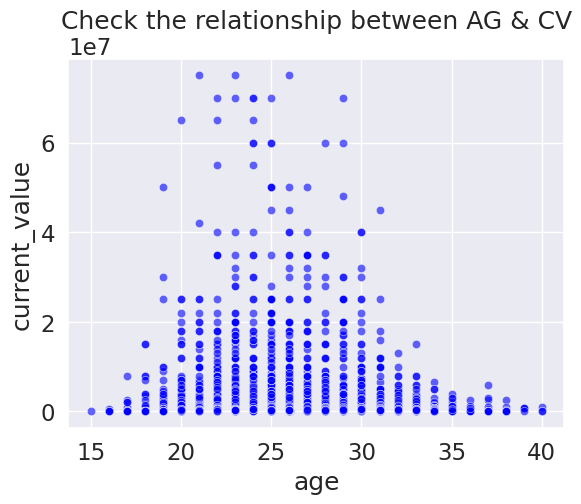

In [ ]:
# 역시 scatter plot을 이용해 가장 높은 음의 상관관계를 보인 두 변수의 관계를 탐색해보겠습니다.

sns.scatterplot(data= defender_df, x= 'age', y='current_value', markers='o', color='blue', alpha=0.6)
plt.title('Check the relationship between AG & CV')
plt.show()

해설: age와 current_value는 -0.073550의 약한 음의 상관관계를 가지고 있다는 결과가 나왔으나, 산점도 결과는 해당 패턴을 확인할 수 없었습니다. 그 이유 중 하나로 두 데이터의 분포가 일치하지 않기 때문임을 들 수 있습니다. 데이터들의 분포를 맞춰줘야 할 것 같습니다.

# **4. 모델링 하기**

: 이제 분석을 위해 정리된 독립변수들을 활용하여 수비수의 이적료를 예측하는 회귀 모델을 만들겠습니다.

In [ ]:
defender_df.head(5)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,6408,175,22,9,50000000,50000000
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,5031,238,51,21,40000000,80000000
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,4762,148,27,1,25000000,70000000
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,5471,95,19,10,15000000,35000000
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0000,0.0,416,932,169,7,2000000,20000000


In [ ]:
defender_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528 entries, 3 to 10735
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               3528 non-null   object 
 1   team                 3528 non-null   object 
 2   name                 3528 non-null   object 
 3   position             3528 non-null   object 
 4   height               3528 non-null   float64
 5   age                  3528 non-null   float64
 6   appearance           3528 non-null   int64  
 7   goals                3528 non-null   float64
 8   assists              3528 non-null   float64
 9   yellow cards         3528 non-null   float64
 10  second yellow cards  3528 non-null   float64
 11  red cards            3528 non-null   float64
 12  minutes played       3528 non-null   int64  
 13  days_injured         3528 non-null   int64  
 14  games_injured        3528 non-null   int64  
 15  award                3528 non-null   int64

# **4-1. 데이터 전처리**


참고사항 1: 1차 시도 때, 변수들의 분포를 제대로 맞춰주지 않은 채 모델을 학습시키니, RMSE가 매우 크게 나오는 등 결과에 부정적인 영향을 미치는 것을 알 수 있었습니다. 따라서 밑의 내용인 2차 시도에서는 분포를 맞춰주었습니다.

참고사항 2: 밑에 첨부한 사진(1차 시도 때의 다중공선성 결과)에서도 알 수 있듯이, 1차 시도 때 'appearance', 'minutes played', 'days_injured', 'games_injured' 변수들이 역시 10을 훨씬 넘는 수치로 다중공선성이 높은 것을 알 수 있었습니다. 앞서 언급하였듯, 보통 이적료나 선수의 가치를 볼 때, 출전 시간보다는 일차적으로 출전 수를 많이 보고 결장한 날짜보단, 경기 수를 보는 것이 바람직하기에 해당 변수들을 남기도록 하겠습니다.

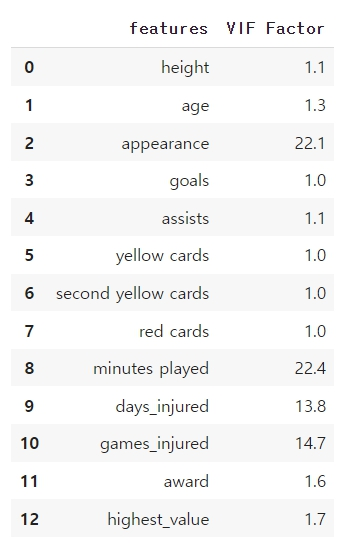

**[vif 진행 후 중복 피쳐 제거]**

In [ ]:
# minutes played 대신, appearance 만 포함
if 'minutes played' in defender_df.columns:
    defender_df = defender_df.drop('minutes played', axis=1)

In [ ]:
#days_injured 대신, games_injured 만 포함
if 'days_injured' in defender_df.columns:
    defender_df = defender_df.drop('days_injured', axis=1)

**[로그 스케일]**

앞서 히스토그램으로 피쳐들의 데이터 분포를 보았을 때, 왼쪽으로 치우쳐있는 분포가 많은 것을 알 수 있었습니다. 따라서 피쳐 분포의 왜곡을 보정하고 분산을 안정화하기 위해 분포가 치우쳐있던 피쳐들을 로그 스케일을 사용하여 분석에 적합하게 변환하겠습니다.

이미 정규분포의 모양을 따르는 피쳐들은 그대로 두었습니다.

In [ ]:
# current_value의 최솟값은 0입니다. 그러나 log0은 - 무한대이기 때문에 계산에 편리하도록 log1p을 사용하겠습니다.
defender_df['log_current_value'] = np.log1p(defender_df['current_value'])

In [ ]:
#피쳐 중에서도 정규분포에서 많이 벗어나서 한쪽으로 치우쳐진 피쳐들을 로그 스케일로 맞춰주겠습니다.
log_columns = ['goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'games_injured', 'award', 'highest_value']

for col in log_columns:
  defender_df[f'log_{col}'] = np.log1p(defender_df[col])

In [ ]:
# 피쳐들의 드랍과 생성이 제대로 이루어짐을 확인했습니다.
defender_df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'games_injured', 'award', 'current_value', 'highest_value',
       'log_current_value', 'log_goals', 'log_assists', 'log_yellow cards',
       'log_second yellow cards', 'log_red cards', 'log_games_injured',
       'log_award', 'log_highest_value'],
      dtype='object')

**[Scaler]**

* 먼저 특징들의 범주(scale) 차이를 없애기 위해 수치형 변수에 대해서 표준화를 진행합니다.

* 문자형 변수들인 'player', 'team', 'name', 'position'를 제외한 모든 수치형 변수에 대해 표준화를 진행합니다.

In [ ]:
# 다시 수치형 feature standardization

from sklearn.preprocessing import StandardScaler

n_scale_columns = ['height', 'age', 'appearance', 'log_goals', 'log_assists', 'log_yellow cards',
                 'log_second yellow cards', 'log_red cards', 'log_games_injured',
                 'log_award', 'log_highest_value']

scaler = StandardScaler()
defender_df[n_scale_columns] = scaler.fit_transform(defender_df[n_scale_columns])

In [ ]:
# 스케일 전 테이블
defender_df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,highest_value,log_current_value,log_goals,log_assists,log_yellow cards,log_second yellow cards,log_red cards,log_games_injured,log_award,log_highest_value
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,-1.171599,-0.283156,1.795713,0.028090,0.056180,0.224719,...,50000000,17.727534,-0.205381,0.054650,0.243501,-0.258992,-0.284699,0.791235,2.091592,1.628595
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,1.328429,0.806940,1.041821,0.017889,0.017889,0.053667,...,80000000,17.504390,-0.363982,-0.415988,-0.866283,-0.258992,-0.284699,1.296181,3.118874,1.839901
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,1.797184,0.806940,1.240214,0.037799,0.000000,0.302394,...,70000000,17.034386,-0.055877,-0.641969,0.697142,0.570340,-0.284699,0.912998,-0.005348,1.779867
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,0.703422,0.370902,1.319571,0.000000,0.032901,0.115153,...,35000000,16.523561,-0.645996,-0.229401,-0.447890,-0.258992,-0.284699,0.704722,2.215772,1.468239
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,0.390918,1.024960,-1.140500,0.000000,0.000000,0.216346,...,20000000,14.508658,-0.645996,-0.641969,0.192892,-0.258992,-0.284699,2.029416,1.800858,1.216645


In [ ]:
# Scaler 적용 후 테이블
defender_df[n_scale_columns].head()

,height,age,appearance,log_goals,log_assists,log_yellow cards,log_second yellow cards,log_red cards,log_games_injured,log_award,log_highest_value
3,-1.171599,-0.283156,1.795713,-0.205381,0.054650,0.243501,-0.258992,-0.284699,0.791235,2.091592,1.628595
4,1.328429,0.806940,1.041821,-0.363982,-0.415988,-0.866283,-0.258992,-0.284699,1.296181,3.118874,1.839901
5,1.797184,0.806940,1.240214,-0.055877,-0.641969,0.697142,0.570340,-0.284699,0.912998,-0.005348,1.779867
6,0.703422,0.370902,1.319571,-0.645996,-0.229401,-0.447890,-0.258992,-0.284699,0.704722,2.215772,1.468239
7,0.390918,1.024960,-1.140500,-0.645996,-0.641969,0.192892,-0.258992,-0.284699,2.029416,1.800858,1.216645


**[Data Setting] training/test set 나누기**


: 학습 후 도출될 예측 모델의 성능을 평가하기 위해, 먼저 전체 데이터셋을 "Training set"과 "Test set"으로 나눕니다.

Training set에서 모델을 학습하고 Test set에서 모델의 예측 성능을 검증합니다.

In [ ]:
from sklearn.model_selection import train_test_split

X = defender_df[n_scale_columns]
y = defender_df['log_current_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((2822, 11), (2822,))

In [ ]:
X_test.shape, y_test.shape

((706, 11), (706,))

In [ ]:
#log_current_value 값을 의미합니다.
y_train

3102    14.914123
808     12.206078
2928    13.710151
1611    15.687313
5264    15.761421
          ...    
8248    12.429220
2625    17.370859
3183    15.607270
686     16.523561
3074    13.458837
Name: log_current_value, Length: 2822, dtype: float64

In [ ]:
X_train

,height,age,appearance,log_goals,log_assists,log_yellow cards,log_second yellow cards,log_red cards,log_games_injured,log_award,log_highest_value
3102,-1.952858,0.588921,1.438606,0.152090,0.406727,-0.529288,-0.258992,-0.284699,1.539175,1.188489,0.363729
808,2.109687,-0.937213,-0.704036,4.110324,0.216923,0.149058,2.726032,-0.284699,0.275667,-0.908451,-0.853766
2928,0.078415,-0.937213,0.843428,-0.355039,-0.179865,0.224317,-0.258992,0.542303,-1.149625,-0.908451,-0.177558
1611,0.390918,0.806940,2.271856,0.785540,1.430577,-0.587959,0.259412,-0.284699,-0.153389,-0.005348,0.986985
5264,0.547170,-1.373252,1.478285,0.337973,1.590636,0.138495,0.442128,0.430887,0.054886,-0.908451,0.744661
...,...,...,...,...,...,...,...,...,...,...,...
8248,0.078415,-0.937213,-1.338893,-0.645996,-0.641969,-1.251937,-0.258992,-0.284699,-1.149625,-0.908451,-0.753444
2625,0.078415,0.152883,0.764071,-0.023540,-0.390139,0.565613,-0.258992,-0.284699,1.414961,3.285429,1.528273
3183,0.703422,-0.937213,-1.259536,-0.645996,6.422694,-1.251937,-0.258992,-0.284699,0.639505,-0.908451,0.675357
686,0.703422,-0.283156,0.922785,0.451347,3.416708,-0.039845,0.524998,-0.284699,0.791235,1.426036,1.279479


**[다중공선성] VIF: Variance Inflation Factor**

회귀 분석에서 하나의 독립 변수가 다른 독립 변수와의 상관관계가 높으면(다중공선성이 존재하면) 회귀 분석 모델링 결과에 부정적인 영향을 미칠 수 있기 때문에, 모델링을 진행하기에 앞서 다중공선성의 존재 여부를 확인해야 합니다.

보통 다중공선성을 판단할 때 VIF(Variance Inflation Factors) 값을 확인합니다.

일반적으로 VIF> 10인 독립변수들은 다른 변수와의 상관관계가 높음을 의미합니다. (다중공선성이 존재함을 의미합니다.) 해당 변수는 모델링에서 고려하지 않는 것이 좋습니다.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

,features,VIF Factor
0,height,1.1
1,age,1.3
2,appearance,1.3
3,log_goals,1.0
4,log_assists,1.1
5,log_yellow cards,1.0
6,log_second yellow cards,1.0
7,log_red cards,1.0
8,log_games_injured,1.5
9,log_award,1.4


해석: 모든 변수가 다중공선성이 10이하임을 알 수 있습니다.

# **4-2. 회귀모델링**

  1.  먼저 Training set에서 선형 회귀 예측 모델을 학습합니다.

  2.  도출된 모델을 Test set에 적용해 최근 이적료('log_current_value')을 예측합니다.

  3.  실제 'log_current_value' 값과 비교하여 모델의 예측 성능을 평가하는 데 활용하게 됩니다.

In [ ]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

#**4-3. 모델해석하기**

: 각 설명변수 (특징변수, 속성, 독립변수, x, 열) 에 대한 회귀계수를 확인합니다.

In [ ]:
# print coef: 계수를 출력합니다.
print(lr.coef_)

[ 0.03443137 -0.42510428  0.18758909  0.03264257  0.02442991 -0.00650328
 -0.04236463  0.00921804 -0.09757443 -0.07141647  2.13222732]


In [ ]:
#"feature - coefficients" DataFrame 만들기
# zip 키워드는 리스트 2개를 하나로 묶습니다.(결과는 튜플로 됩니다.)
coefs = pd.DataFrame(zip(defender_df[n_scale_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])

coefs

,feature,coefficients
0,height,0.034431
1,age,-0.425104
2,appearance,0.187589
3,log_goals,0.032643
4,log_assists,0.024430
5,log_yellow cards,-0.006503
6,log_second yellow cards,-0.042365
7,log_red cards,0.009218
8,log_games_injured,-0.097574
9,log_award,-0.071416


In [ ]:
# 크기 순대로 나열합니다.
# 크기 순서로 나열 : 내림차순으로 합니다. 다만 양, 음을 가리지 않습니다. 절대값을 기준으로 합니다.
# 절대값 기준 함수: coefficients.abs().sort_values

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending= False).index)

coefs_new

,feature,coefficients
10,log_highest_value,2.132227
1,age,-0.425104
2,appearance,0.187589
8,log_games_injured,-0.097574
9,log_award,-0.071416
6,log_second yellow cards,-0.042365
0,height,0.034431
3,log_goals,0.032643
4,log_assists,0.024430
7,log_red cards,0.009218


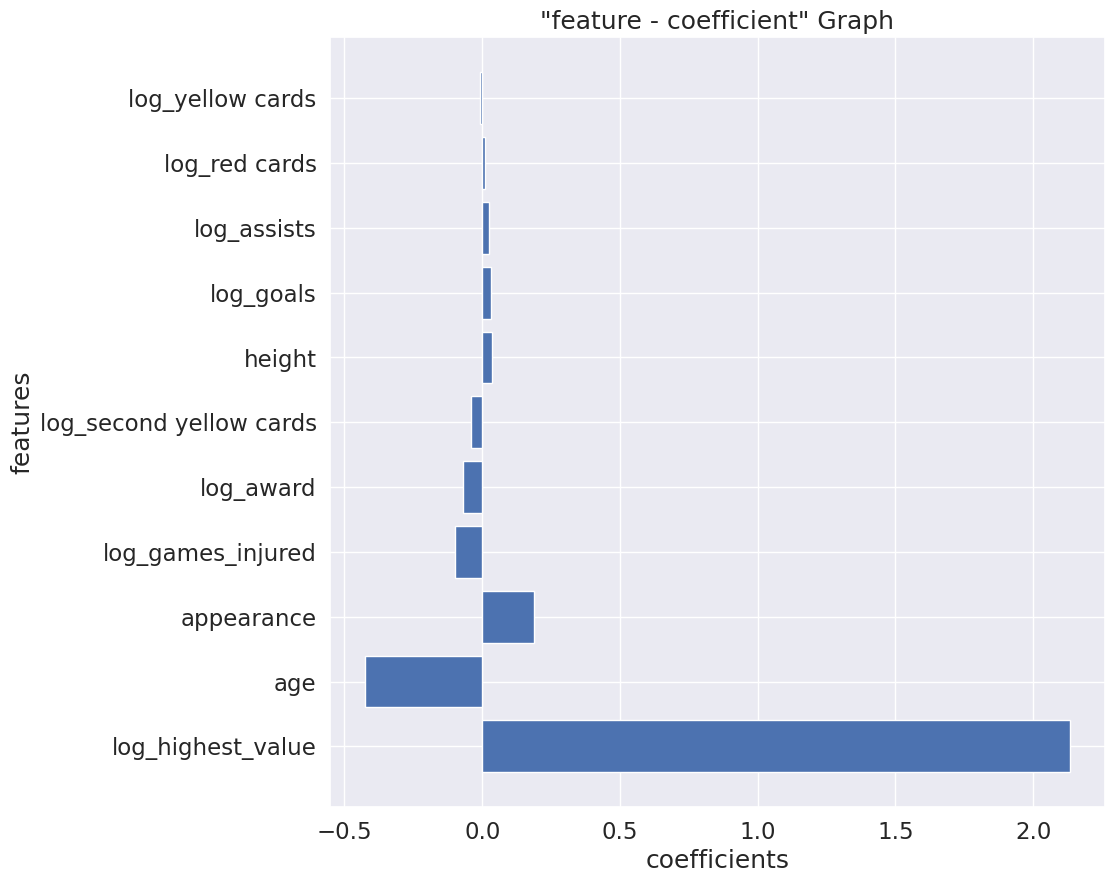

In [ ]:
# coefficients 를 시각화 합니다.

# figure size
plt.figure(figsize = (10, 10))

# bar plot : matplotlib.pyplot 모듈의 barh() 함수를 사용해서 수평 막대 그래프를 그립니다.
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

# **4-3. 모델 해석**


#**4-3-1: 유의성 검정**

: 유의성 검정을 합니다. 통계에서 변수가 유의하다는 의미입니다.

In [ ]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
# 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 합니다.

# ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다.
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_current_value   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1194.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:40:59   Log-Likelihood:                -3896.5
No. Observations:                2822   AIC:                             7817.
Df Residuals:                    2810   BIC:                             7888.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      13.5444      0.018    745.704      0.000      13.509      13.580
height                      0.0344      0.019      1.823      0.068      -0.003       0.071
age                        -0.4251      0.021    -20.459      0.000      -0.466      -0.384
appearance                  0.1876      0.021      9.036      0.000       0.147       0.228
log_goals                   0.0326      0.019      1.730      0.084      -0.004       0.070
log_assists                 0.0244      0.019      1.297      0.195      -0.012       0.061
log_yellow cards           -0.0065      0.018     -0.352      0.725      -0.043       0.030
log_second yellow cards    -0.0424      0.019     -2.261      0.024      -0.079      -0.006
log_red cards               0.0092      0.018      0.526      0.599      -0.025       0.044
log_games_injured          -0.0976      0.022     -4.455      0.000      -0.141      -0.055
log_award                  -0.0714      0.021     -3.342      0.001      -0.113      -0.030
log_highest_value           2.1322      0.023     91.196      0.000       2.086       2.178
==============================================================================
Omnibus:                     4129.576   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1542888.071
Skew:                          -8.714   Prob(JB):                         0.00
Kurtosis:                     116.216   Cond. No.                         2.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train2

,const,height,age,appearance,log_goals,log_assists,log_yellow cards,log_second yellow cards,log_red cards,log_games_injured,log_award,log_highest_value
3102,1.0,-1.952858,0.588921,1.438606,0.152090,0.406727,-0.529288,-0.258992,-0.284699,1.539175,1.188489,0.363729
808,1.0,2.109687,-0.937213,-0.704036,4.110324,0.216923,0.149058,2.726032,-0.284699,0.275667,-0.908451,-0.853766
2928,1.0,0.078415,-0.937213,0.843428,-0.355039,-0.179865,0.224317,-0.258992,0.542303,-1.149625,-0.908451,-0.177558
1611,1.0,0.390918,0.806940,2.271856,0.785540,1.430577,-0.587959,0.259412,-0.284699,-0.153389,-0.005348,0.986985
5264,1.0,0.547170,-1.373252,1.478285,0.337973,1.590636,0.138495,0.442128,0.430887,0.054886,-0.908451,0.744661
...,...,...,...,...,...,...,...,...,...,...,...,...
8248,1.0,0.078415,-0.937213,-1.338893,-0.645996,-0.641969,-1.251937,-0.258992,-0.284699,-1.149625,-0.908451,-0.753444
2625,1.0,0.078415,0.152883,0.764071,-0.023540,-0.390139,0.565613,-0.258992,-0.284699,1.414961,3.285429,1.528273
3183,1.0,0.703422,-0.937213,-1.259536,-0.645996,6.422694,-1.251937,-0.258992,-0.284699,0.639505,-0.908451,0.675357
686,1.0,0.703422,-0.283156,0.922785,0.451347,3.416708,-0.039845,0.524998,-0.284699,0.791235,1.426036,1.279479


#**4-3-2(해설)**

**[coefficient, p-value]**

: coeff와 P>|t|를 봐야 합니다. 여기서 P>|t|는 p-value를 의미합니다. 0.05 보다 작아야 유의합니다.

**[R-Squared]**

: 결정 계수 (coefficient of determination)는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도입니다.
종속 변수의 변동량 중에서 적용한 모형으로 설명 가능한 부분의 비율을 가리킵니다.
결정계수의 통상적인 기호는 R²(R-sqaured)입니다.
일반적으로 모형의 설명력으로 해석되지만 모형에 설명 변수가 늘어갈수록 증가하기 때문에 해석에 주의해야 합니다.
결정계수의 값은 0에서 1 사이에 있으며, 종속 변인과 독립변인 사이에 상관관계가 높을수록 1에 가까워집니다.
즉, 결정계수가 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 결정계수의 값이 클수록 회귀모형의 유용성이 높다고 할 수 있습니다.

* Final Defender Df Feature(column/Attribute/X) List

  * height: 선수의 키(cm 단위)

  * age: 선수의 나이

  * appearance: 경기에 출전한 횟수

  * log_goals: 선수의 득점 수(로그 변환)

  * log_assists: 선수의 어시스트(도움, 득점자에게 마지막으로 준 결정적 패스) 수(로그 변환)

  * log_yellow cards: 1차 경고 받은 수(로그 변환)

  * log_second yellow cards: 2차 경고 받은 수(로그 변환)

  * log_red cards: 퇴장 수(로그 변환)

  * log_games_injured: 선수가 부상으로 인해 결장한 경기 수(로그 변환)

  * log_award: 선수가 받은 상 수(로그 변환)

  * log_current_value: 선수의 현재 이적료(로그 변환)

  * log_highest_value: 선수의 과거 최고 이적료(로그 변환)

# **4-3-3(해설): 모델에 적용하여 해석**

1. p-value 관련: height (0.068), log_goals (0.084), log_assists (0.195), log_yellow cards (0.725), log_red cards (0.599)로 해당 변수들은 p-value가 0.05보다 높아 유의하지 않습니다.

2. 'Positive' 변수 설명: 해당 변수들은 이적료에 Positive한 영향을 미칩니다. 즉, 다른 변수의 값이 고정되었을 때, 해당 변수의 값이 클수록 수비수의 이적료가 높을 것입니다.

  * log_highest_value: 선수의 과거 최고 이적료(highest_value 로그 변환)
  * appearance: 경기에 출전한 횟수
  * height: 선수의 키(cm 단위)
  * log_goals: 선수의 득점 수(로그 변환)
  * log_assists: 선수의 어시스트(도움, 득점자에게 마지막으로 준 결정적 패스) 수(로그 변환)
  * log_red cards: 퇴장 수(로그 변환)

  => 가장 positive한 영향을 주는 변수: log_highest_value

3. 'Negative' 변수 설명: 해당 변수들은 이적료에 Negative한 영향을 미칩니다. 즉, 다른 변수의 값이 고정되었을 때, 해당 변수의 값이 작을수록 수비수의 이적료가 높을 것입니다.

  * age: 선수의 나이
  * log_games_injured: 선수가 부상으로 인해 결장한 경기 수(로그 변환)
  * log_award: 선수가 받은 상 수(로그 변환)
  * log_second yellow cards: 2차 경고 받은 수(로그 변환)
  * log_yellow cards: 1차 경고 받은 수(로그 변환)

  => 가장 Negative한 영향을 주는 변수: age

# **4-4. 모델 예측 결과 및 성능 평가**

# **4-4-1. 모델의 시각화**

: 예측 결과를 시각화합니다.

학습한 모델을 Test set에 적용하여 y값('log_current_value')을 예측합니다.

예측 결과를 확인하기 위해 실제값과 예측값을 한 plot에 출력해 시각화합니다.

In [ ]:
# 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head(20)

,actual,prediction
0,0.000000,0.390638
1,0.000000,0.694654
2,0.000000,12.075599
3,0.000000,0.960445
4,0.000000,0.875890
5,0.000000,0.899599
6,0.000000,10.638480
7,0.000000,0.569327
8,0.000000,0.850076
9,0.000000,0.531667


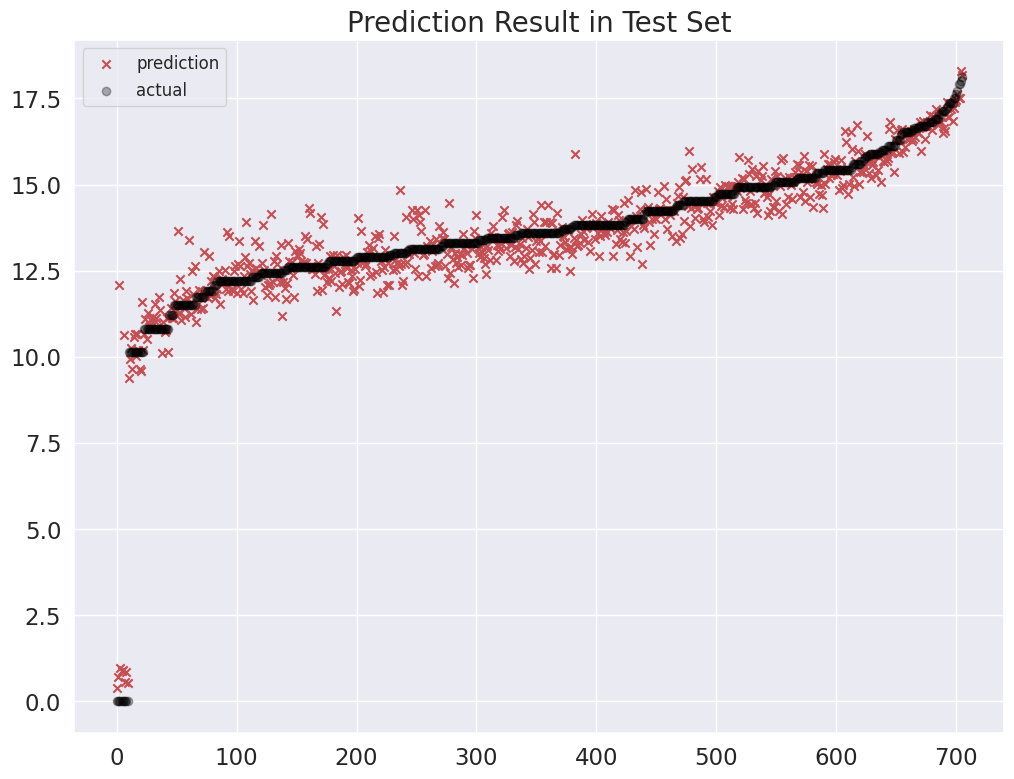

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

해석: 이적료가 낮을수록 예측을 잘 해내지 못하고 있는 것을 볼 수 있습니다.

# **4-4-2. 모델의 성능 평가 (R-squred 와 RMSE(Root Mean Squared Eror))**

In [ ]:
# R squared
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.8237993317527956
0.8738011579139273


In [ ]:
# RMSE(Root Mean Squared Eror)
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

0.9625441900619541
0.8044236756009138


해설: Test set에서 해당 예측 모델의 R squared가 0.87이고, RMSE가 0.80 입니다.


요약

주제: 축구 선수 중 수비수 이적료 예측

**회귀식: 수비수 이적료(y, log_current_value) = (+2.132)x log_highest_value(x1) + (-0.425)x age(x2) + (+0.187)x appearance(x3) + (-0.097)x log_games_injured(x4) + (-0.071)x log_award(x5) + (-0.042)x log_second yellow cards(x6) + (+0.034)x height(x7) + (+0.032)x log_goals(x8) + (+0.024)x log_assists(x9) + (+0.009)x log_red cards(x10) + (-0.006)x log_yellow cards(x11)**

가장 + 변수: log_highest_value

가장 - 변수: age